In [1]:
import pandas as pd

*Задачи*
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиальные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
 

Описание данных
user_data:

client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст
logs:

client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unixl

In [2]:
us = pd.read_csv(
    'https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [3]:
us.sort_index()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
lg = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [5]:
lg['time'] = pd.to_datetime(lg['time'])
lg.head()

,client,success,platform,time
0,40177,True,phone,1970-01-01 00:00:01.585412212
1,61468,True,phone,1970-01-01 00:00:01.585425658
2,35604,False,phone,1970-01-01 00:00:01.585459894
3,9961,True,phone,1970-01-01 00:00:01.585400189
4,10931,True,computer,1970-01-01 00:00:01.585468629


Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?   -
 
 **Где взять данные?**
    
    Краткое напоминание - данные лежат на сервере в папках соответствующих уроку в `/shared/homeworks/python_ds_miniprojects`, либо их можно скачать по ссылке на 1-ом стэпе этой части упражнений
    
- **Как узнать число строк и столбцов в таблице**
    
    Чтобы узнать размер таблицы (датафрэйма), нужно обратиться к атрибуту `shape`
    
- **А что есть что в ответе от** `shape`**?**
    
    `shape` возвращает кортеж (упрощённый список, относитесь к нему, как к списку), где сначала идёт число строк, а потом число колонок
    
- **Как выяснить типы колонок?**
    
    Для этого нужен атрибут `dtypes`
    
- **Краткая сводка**
    
    Чтобы быстро взглянуть на информацию о распределении данных, можно использовать метод `describe`, например,
    
    ```python
    df.describe()
    ```
    
    Выведет эту информацию для колонок `df`
    
- **Подсчёт числа уникальных значений**
    
    Используйте метод `nunique`, чтобы получить число уникальных значений для каждой колонки датафрэйма
    
- **Посмотреть разбор**
    
    Посмотреть разбор задания можно по ссылке [https://youtu.be/Xkxdes5EdAk](https://youtu.be/Xkxdes5EdAk)

In [6]:
lg.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456
- **Как решить это задание?**
    
    Отберите успешные операции с помощью `query`, проведите группировку по клиентам, и посчитайте для каждого клиента число успешных операций с помощью `count`. Далее найдите максимальное значение и отберите всех клиентов с таким числом операций. После этого отсортируйте их `id` по возрастанию
    
- **Как понять, что операция успешна?**
    
    В колонке `success` будет `True`)
    
- **Как делать группировку?**
    
    Для этого существует метод `groupby` - его вызов группирует строки по значениям в какой-то колонке (или комбинации значений из нескольких колонок). Например
    
    ```python
    df.groupby('pickup_month')
    ```
    
    Сгруппирует данные датафрэйма `df` по колонке `pickup_month` - то есть строки с месяцем январь в колонке `pickup_month` будут в отдельной колонке от строк с месяцем май. Сама по себе группировка не вычисляет что-то по группам
    
- **Как сделать агрегацию?**
    
    Метод `agg` принимает словарь, где в качестве ключей указаны названия колонок, а значениями являются функции, которые нужно применить к колонке-ключу в каждой группе. К примеру, этот код
    
    ```python
    df.groupby('pickup_month') \
    .agg({'temp': 'sum'})
    ```
    
    Сгруппирует строки по значению в колонке `pickup_month` (месяц поездки) и посчитает в каждой группе сумму по колонке `temp`
    
- **Взятие максимума**
    
    Для этого используется метод `max`, который возвращает максимальное значение для каждой колонки в датафрэйме
    
- **Сортировка датафрэйма**
    
    Для сортировки датафрэйма используется метод `sort_values`. Он принимает название колонки, по которой будет идти сортировка. К примеру,
    
    ```python
    df.sort_values('temp')
    ```
    
    Сортирует строки по колонке `temp`
    
- **Сортировка серии**
    
    Если у вас серия, то при её сортировке не указывайте ничего в аргументах (так как есть только одни значения, по которым можно сортировать). Например,
    
    ```python
    series.sort_values()
    ```
    
    отсортирует `series`
    
- **Посмотреть разбор**
    
    Посмотреть разбор задания можно по ссылке [https://youtu.be/Y0HaHwsJCD4](https://youtu.be/Y0HaHwsJCD4)

In [7]:
success_number = lg.groupby('client',as_index=False)\
                    .agg({'success': 'sum'})\
                    .rename(columns={'success': 'success_number'})\
                    .sort_values('success_number',ascending=False)
                    

In [8]:
maximum_success = success_number.success_number.max()

In [9]:
success_client = success_number.query('success_number == @maximum_success')\
                                .sort_values('client')\
                                .client\
                                .tolist()             

In [10]:
success_client

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [11]:
', '.join([str(client) for client in success_client])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

С какой платформы было совершено наибольшее количество успешных операций?

- **Как решать это задание?**
    
    Отберите успешные операции с помощью `query`, проведите группировку по платформам, и посчитайте для каждой число успешных операций с помощью `count`. Далее найдите максимальное значение
    
- **Как понять, что операция успешна?**
    
    В колонке `success` будет `True`)
    
- **Как сравнивать в** `query` **с логическими значениями?**
    
    Чтобы сравнить в `query` с `True` или `False` нужно просто написать там нужно логическое значение. Например,
    
    ```python
    df.query('column1 == True')
    ```
    
    чтобы отобрать только строки, где в `column1` `True`
    
- **Как делать группировку?**
    
    Для этого существует метод `groupby` - его вызов группирует строки по значениям в какой-то колонке (или комбинации значений из нескольких колонок). Например
    
    ```python
    df.groupby('pickup_month')
    ```
    
    Сгруппирует данные датафрэйма `df` по колонке `pickup_month` - то есть строки с месяцем январь в колонке `pickup_month` будут в отдельной колонке от строк с месяцем май. Сама по себе группировка не вычисляет что-то по группам
    
- **Как сделать агрегацию?**
    
    Метод `agg` принимает словарь, где в качестве ключей указаны названия колонок, а значениями являются функции, которые нужно применить к колонке-ключу в каждой группе. К примеру, этот код
    
    ```python
    df.groupby('pickup_month') \
    .agg({'temp': 'sum'})
    ```
    
    Сгруппирует строки по значению в колонке `pickup_month` (месяц поездки) и посчитает в каждой группе сумму по колонке `temp`
    
- **Взятие максимума**
    
    Для этого используется метод `max`, который возвращает максимальное значение для каждой колонки в датафрэйме
    
- **Посмотреть разбор**
    
    Посмотреть разбор задания можно по ссылке [https://youtu.be/MdX8ezAr8-0](https://youtu.be/MdX8ezAr8-0)

In [12]:
lg.query('success == True')\
    .groupby('platform')\
    .agg({'client': 'sum'})

,client
platform,
computer,55446768
phone,103307841
tablet,9111274


In [13]:
lg.query('success == True').platform.value_counts().idxmax()

'phone'

Какую платформу предпочитают премиальные клиенты?

- **Что делать в этом задании?**
    
    Объедините датафрэймы с клиентами и логами, затем отберите премиумных клиентов, возьмите колонку `platform` и посчитаете частоту использования с помощью `value_counts`
    
- **Как делать джойн**
    
    Для применения джойна по колонкам 2-ух датафрэймов используйте метод `merge`. Он принимает 2-ой датафрэйм. Также можно указать по какой колонке объединять и как. Например,
    
    ```python
    df.merge(other_df, on='same_column', how='inner')
    ```
    
    Где
    
    `other_df` - другой датафрэйм
    
    `on` - параметр, принимающий название общей колонки в 2-ух дф, по которой нужно объединять
    
    `how` - параметр, принимающий тип джойна
    
    То есть тут мы объединили `df` с `other_df` по колонке `same_column` иннер джойном
    
- **Как сравнивать в** `query` **с логическими значениями?**
    
    Чтобы сравнить в `query` с `True` или `False` нужно просто написать там нужно логическое значение. Например,
    
    ```python
    df.query('column1 == True')
    ```
    
    чтобы отобрать только строки, где в `column1` `True`
    
- **Посмотреть разбор**
    
    Посмотреть разбор задания можно по ссылке [https://youtu.be/PAIwFwrAsdk](https://youtu.be/PAIwFwrAsdk)

In [14]:
us.merge(lg, on='client', how='inner')\
    .query('premium == True')\
    .aggregate('platform')\
    .value_counts()\
    .idxmax()

'phone'

In [15]:
data = us.merge(lg)

In [20]:
data.query('premium == True').platform.value_counts().idxmax()

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

- 

**Как визуализировать распределение?**
    
    Используйте функцию `sns.distplot`, которая принимает серию (колонку датафрэйма). К примеру,
    
    ```python
    sns.distplot(df.column1)
    ```
    
    Нарисует распределение значений из колонки `column1`
    
- **Как визуализировать 2 распределения на одной картинке?**
    
    Просто напишите 2 вызова `sns.distplot` на нужных данных в одной ячейке ноутбука. Например,
    
    ```python
    sns.distplot(df.column1)
    sns.distplot(df.column2)
    ```
    
    Нарисует распределения значений из колонок `column1` и `column2`
    
- **Я выбираю правильный вариант, но он не засчитывается, почему?**
    
    Обратите внимание на цвета графика (при построении не меняйте настройки по умолчанию) - возможно дело в них
    
- **Посмотреть разбор**
    
    Посмотреть разбор задания можно по ссылке [https://youtu.be/2sIT4Lflrlg](https://youtu.be/2sIT4Lflrlg)

In [27]:
import seaborn as sns
# import matplotlib.pyplot as plt

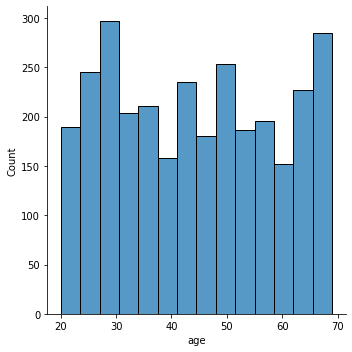

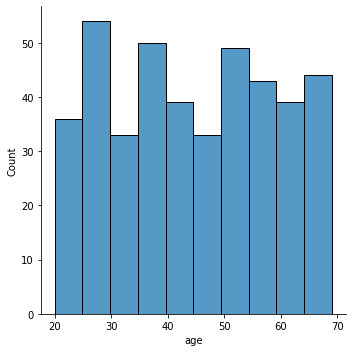

In [28]:
sns.displot(data.query("premium	== False").age)
sns.displot(data.query("premium	== True").age)

In [30]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1970-01-01 00:00:01.585452839
1,4391,False,55,False,phone,1970-01-01 00:00:01.585409861
2,27372,False,64,False,phone,1970-01-01 00:00:01.585446018
3,11989,False,44,True,computer,1970-01-01 00:00:01.585403698
4,60664,False,49,True,phone,1970-01-01 00:00:01.585406918


C:\Users\Demyanovich\.virtualenvs\Lengit-s3d9Tfey\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Demyanovich\.virtualenvs\Lengit-s3d9Tfey\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

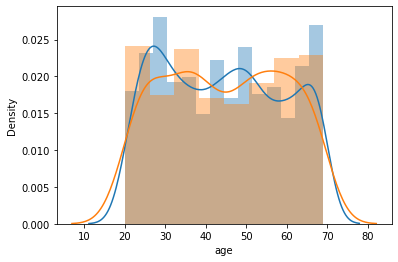

In [34]:
sns.distplot(data.query("premium == False").age)
sns.distplot(data.query("premium == True").age)

In [35]:
import matplotlib.pyplot as plt

C:\Users\Demyanovich\.virtualenvs\Lengit-s3d9Tfey\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Demyanovich\.virtualenvs\Lengit-s3d9Tfey\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

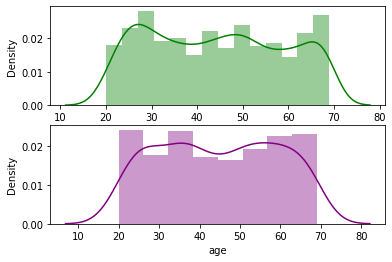

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(data.query("premium == False").age, ax=ax[0], color='green')
sns.distplot(data.query("premium == True").age, ax=ax[1], color='purple')